# Convolutional Siamese Neural Network

Import the libraries.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from Convolutional_Siamese import *
from Siamese_Dataset_Loader import *

In [42]:
tf.reset_default_graph()
nn = Siamese()
nn.logits = nn.forward_prop()
data = Loader(n_examples=17)
print(data.X.shape)
nn.cost = nn.compute_cost()

16398
(964, 17, 105, 105, 1)


In [49]:
print(data.X[0,0].shape)

(105, 105, 1)


In [52]:
var_list1 = [
    nn.parameters["W1"],
    nn.parameters["b1"],
    nn.parameters["W2"],
    nn.parameters["b2"]
]
var_list2 = [
    nn.parameters["W3"],
    nn.parameters["b3"],
    nn.parameters["W4"],
    nn.parameters["b4"]
]
learning_rate1 = tf.placeholder(dtype= tf.float32, shape=[])
learning_rate2 = tf.placeholder(dtype=tf.float32, shape=[])

optimizer_1 = tf.train.MomentumOptimizer(learning_rate=learning_rate1,momentum=0.5).minimize(nn.cost,var_list=var_list1)
optimizer_2 = tf.train.MomentumOptimizer(learning_rate=learning_rate2,momentum=0.5).minimize(nn.cost,var_list=var_list2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    _, _ = sess.run([optimizer_1, optimizer_2], feed_dict={learning_rate1:0.1, learning_rate2:0.5, nn.X: data.X[0] , nn.X2:data.X[1], nn.Y: np.zeros([1,17])})
    

In [32]:
print(data.X[0].shape)

(17, 105, 105, 1)


In [33]:
nn.cost = nn.compute_cost()

learning_rate1 = tf.placeholder(dtype=tf.float32, shape=[])
learning_rate2 = tf.placeholder(dtype=tf.float32, shape=[])

momentum1 = tf.placeholder(dtype=tf.float32, shape=[])
momentum2 = tf.placeholder(dtype=tf.float32, shape=[])




opt1 = tf.train.MomentumOptimizer(learning_rate=learning_rate1,momentum=momentum1)
opt2 = tf.train.MomentumOptimizer(learning_rate=learning_rate2,momentum=momentum2)

nn.gradients = tf.gradients(nn.cost, [
                                    nn.parameters["W1"],
                                    nn.parameters["b1"],
                                    nn.parameters["W2"],
                                    nn.parameters["b2"]
                                ])

In [41]:
var_list1 = [nn.parameters["W1"],nn.parameters["b1"]]
var_list2 = [nn.parameters["W2"],nn.parameters["b2"]]
grads1 = nn.gradients[:2]
grads2 = nn.gradients[2:4]
w1 = w
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    _, _ = sess.run([ 
                opt1.apply_gradients((zip(grads1,var_list1))),
                opt2.apply_gradients((zip(grads2,var_list2)))
    ], feed_dict= {
        learning_rate1:0.1,
        learning_rate2:0.1,
        momentum1:0.1,
        momentum2:0.1,
        nn.X:data.X[0],
        nn.X2:data.X[1],
        nn.Y:np.zeros([1,17])
    })
    w = sess.run(var_list1[0])
print(w[:1])
print(w1[:1])

[[[[ 7.0264000e-01  2.5011921e+00 -1.0543228e+00  9.2118973e-01
     7.3179064e+00  6.4040911e-01 -2.6244535e+00  1.8144587e-01
     4.6174235e+00 -3.5955935e+00 -4.7809153e+00 -3.2638993e+00
    -4.6327977e+00  5.4205432e+00  9.2196330e-02 -1.9609294e+00
    -3.6889534e+00  1.6569173e+00  1.8980429e+00  3.0803902e+00
    -2.8843862e-01  4.2433476e-01 -3.2002180e+00 -2.2236209e+00
    -5.8449757e-01 -2.1579003e+00  4.2353425e+00 -1.2371918e-01
     1.6654291e+00 -3.5872975e-01 -5.4171532e-01  4.9413867e+00
    -2.8320200e+00 -1.9842333e+00 -3.5921998e+00  1.4474114e+00
    -3.8062949e+00 -5.2534258e-01 -1.1365607e+00  2.9188948e+00
    -4.2302170e-01  2.2689816e-01  4.1693821e+00  2.3693032e+00
    -7.1492290e-01 -7.1314400e-01 -3.4496067e+00 -9.1442816e-02
    -1.1901569e+00  1.1583740e+00  2.3003869e+00 -2.2888565e+00
     2.1871631e+00 -2.3205864e+00  3.1387454e-01 -1.4118755e+00
    -8.9030445e-01 -9.0252848e+00  7.0458561e-02  5.3823805e-01
     1.8450634e+00 -2.1873956e+00  7.244

In [ ]:
logits = np.array([[0., 0., 0.]])
labels = np.array([[1.,1.,1.]])
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels = labels)

In [43]:
with tf.Session() as sess:
    cost = sess.run(cost)
    logits = sess.run(tf.nn.sigmoid(logits))

In [46]:
print(cost)
print(logits > 0.5)

[[0.69314718 0.69314718 0.69314718]]
[[False False False]]


In [65]:
def create_new_test_set():
    import shutil
    test_path = '/Users/mehmetbezcioglu/Downloads/omniglot_test_v2'
    for s,_,files in os.walk('/Users/mehmetbezcioglu/Downloads/images_background'):
        for file in files:
            if (('18.png' in file) or ('19.png' in file) or ('20.png' in file)):
                shutil.move(os.path.join(s,file),os.path.join(test_path,file))

In [14]:
d = {1:'a', 2:'f'}
print(list(d.keys()))
d[1]
C = Siamese()

[1, 2]


In [64]:
from enum import Enum
class file(Enum):
    TRAIN = 0
    TEST = 1

file(0).name

class test():
    x = 0
    def __init__(self):
        test.x += 1
test()

# Generate test data

-  First 500 images are 'SAME'- > labelled as 0
-  Last 500 images are 'DIFFERENT' -> labelled as 1

## Splitting of the data
-  images_background folder consists of 30 alphabets for **TRAINING**
-  images_evaluation folder consists of 20 alphabets for **VALIDATION + EVALUATION**
    -  split images_evaluation set into 1-0 alphabets for validation, the remaining 10 for evaluation


In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from Convolutional_Siamese import *
from Siamese_Dataset_Loader import *
# train_data = Loader(n_examples= 17,normalise=True)
# test_data = Loader(n_examples= 20,path = "/Users/mehmetbezcioglu/Downloads/images_validation",normalise=True)
test_data = Loader(n_examples= 20,path = "/floyd/input/omniglot_test_data",normalise=True)

13180


In [15]:

test_data.X = test_data.X[:350]
print(test_data.X.shape)
# test_data.X.reshape(,,20,105,105,1)

(350, 20, 105, 105, 1)


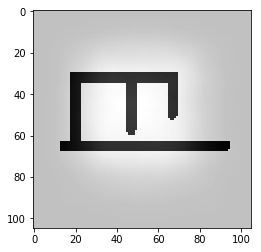

In [16]:
index = 300
plt.imshow(test_data.X[299,19].reshape(105,105),cmap='gray')
plt.show()

In [19]:
def generateOneShotTrials(data):
    '''
    Generates one shot trial for the data given where one one-shot trial is comparing one image against n-images.
    Therefore, comparing 20 different images against 20 images is 20 one-shot trials of each trial being 20-way.
    
    Arguments:
        data -- shape = (n_chars, n_drawers, 105, 105, 1)
    
    Returns:
        trainImgs -- shape  (20,105,105,1)
        testImgs -- shape (20,105,105,1)
        labels -- shape(1,20)
    '''
    chars = np.random.randint(low= 0,high= data.X.shape[0],size=20)
    print("Characters drawn:{}".format(chars))
    drawers = np.random.randint(low=0 ,high=data.X[chars].shape[1],size=2)
    print("Characters drawn:{}".format(drawers))
    testImgs = data.X[chars,drawers[0]]
    trainImgs = data.X[chars,drawers[1]]
#     trainImgs = 
    print(testImgs.shape)
    print(trainImgs.shape)
    labels = chars
#     plt.imshow(testImgs[0].reshape(105,105),cmap='gray')
#     plt.show()
#     plt.imshow(testImgs[1].reshape(105,105),cmap='gray')
#     plt.show()
#     plt.imshow(trainImgs[0].reshape(105,105),cmap='gray')
#     plt.show()
#     plt.imshow(trainImgs[1].reshape(105,105),cmap='gray')
#     plt.show()
    return testImgs,trainImgs,labels.reshape(1,20)

In [22]:
test_imgs, train_imgs, labels = generateOneShotTrials(test_data)
print(labels.shape)

Characters drawn:[309 149  78  22  99 113 218 129 115  10 134 222  34 236 100 205 163 102
  74  98]
Characters drawn:[ 7 15]
(20, 105, 105, 1)
(20, 105, 105, 1)
(1, 20)


# Test implementation of evaluation accuracy
Remove `tf.global_variables_initializer()` line when loading a pre-trained weight set

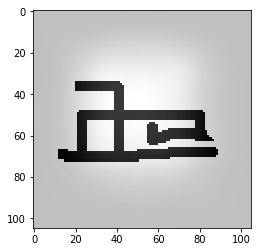

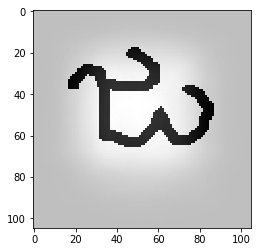

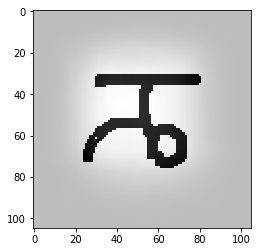

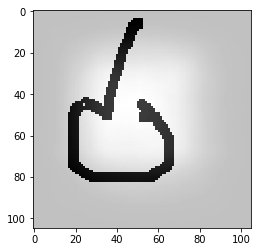

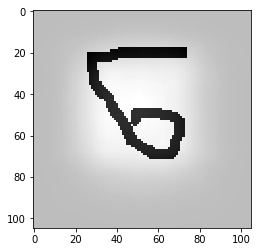

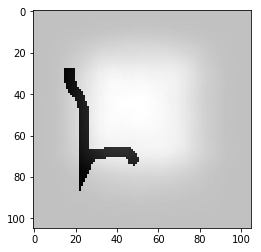

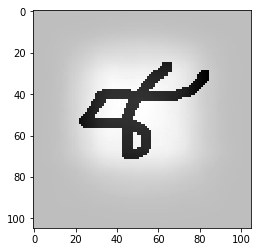

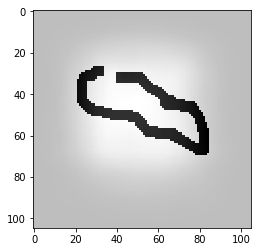

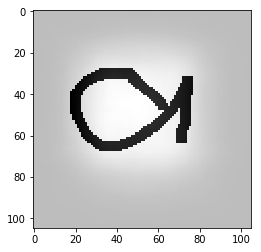

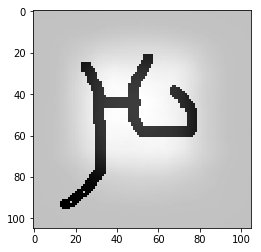

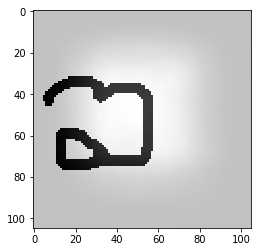

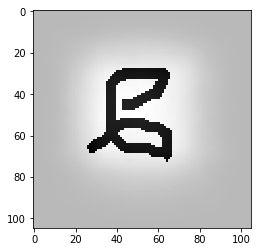

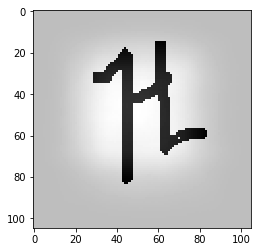

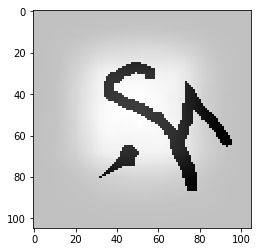

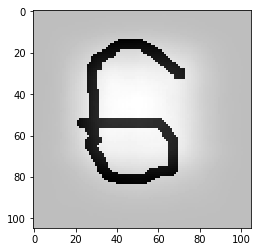

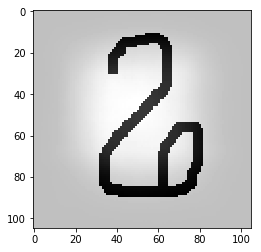

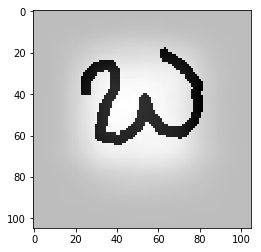

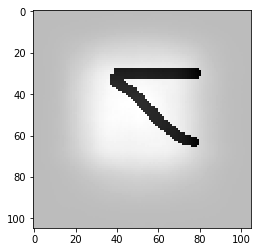

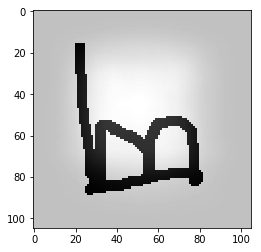

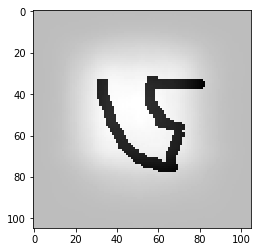

In [23]:
for index in range(train_imgs.shape[0]):
    plt.imshow(train_imgs[index].reshape(105,105),cmap='gray')
    plt.show()

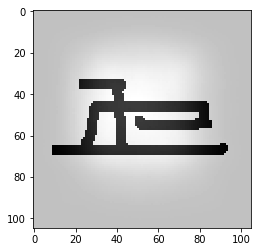

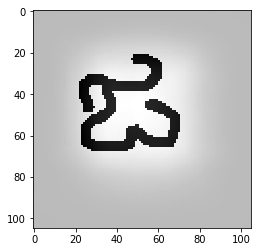

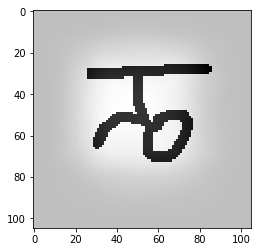

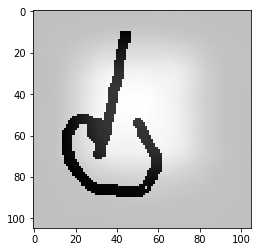

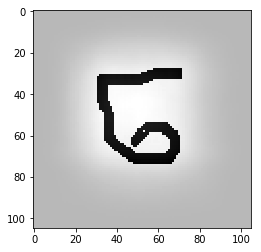

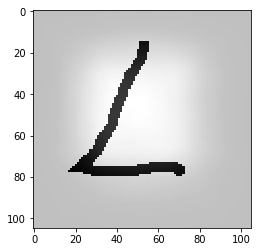

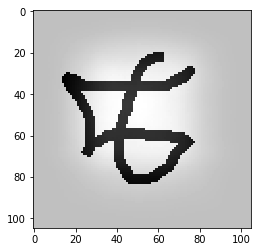

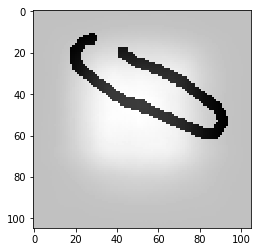

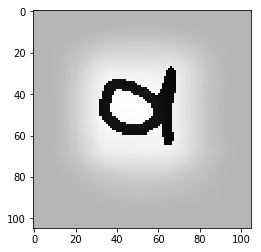

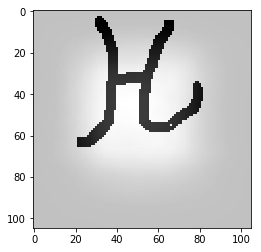

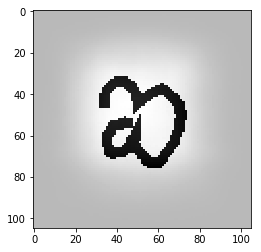

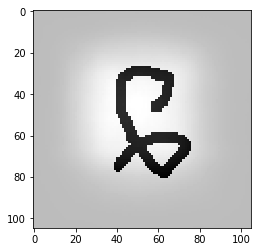

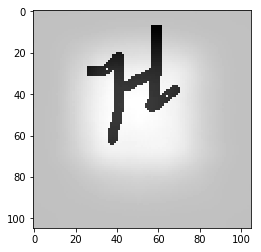

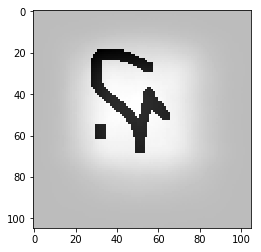

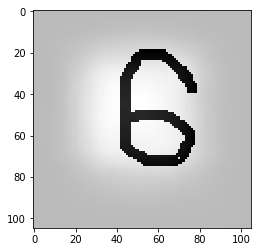

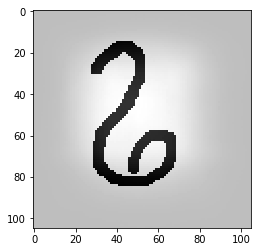

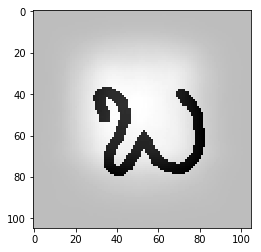

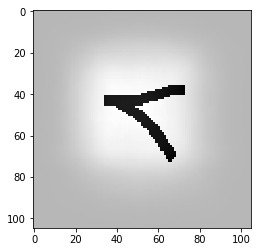

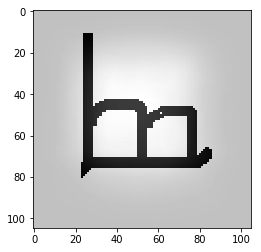

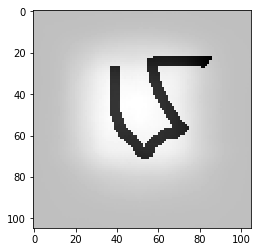

In [24]:
for index in range(test_imgs.shape[0]):
    plt.imshow(test_imgs[index].reshape(105,105),cmap='gray')
    plt.show()

In [274]:
current_image_train_set = np.asarray(list(train_imgs[6]) * 20).reshape(20,105,105,1)
current_train_img_label = labels[0,6]
print(current_image_train_set.shape)
print(test_imgs.shape)
print(current_train_img_label)

(20, 105, 105, 1)
(20, 105, 105, 1)
35


- Each iteration of the loop below is one one-shot trial.
    At the end of the loop we have evaluated 20 one-shot trials.
    If we do this 20 times then we have 400 trials.
    This needs to be done at the end of every epoch.
- <font color='red'> plot the images to ensure the classification is correct< /font>

Tensor("Add_21:0", shape=(1, ?), dtype=float32)
INFO:tensorflow:Restoring parameters from /floyd/input/model/conv_siamese_model.ckpt
Characters drawn:[ 31  41 130 135 323  26 262 219 248 177  70 158 134  10 125 125 230 208
   5 234]
Characters drawn:[18  9]
(20, 105, 105, 1)
(20, 105, 105, 1)


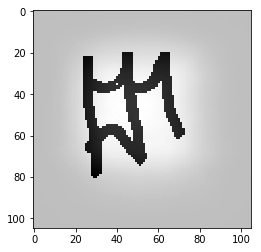

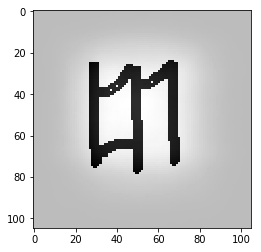

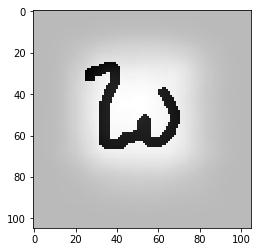

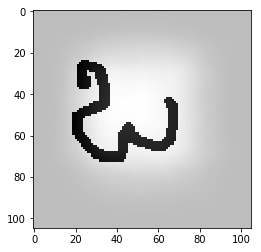

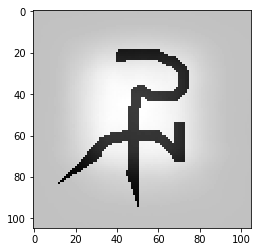

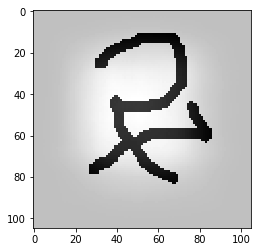

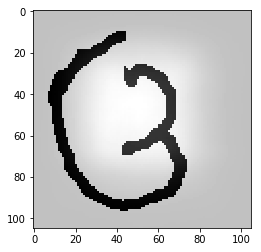

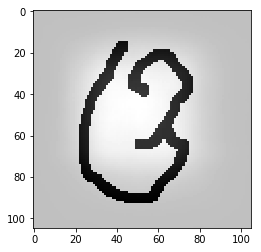

Characters drawn:[ 19 262 234 227 213   4  51   6 131 257 241 153  33 127 179 338  49 333
  83 273]
Characters drawn:[15  2]
(20, 105, 105, 1)
(20, 105, 105, 1)


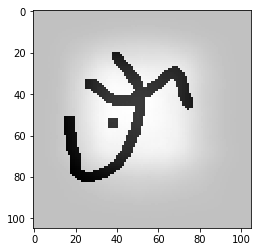

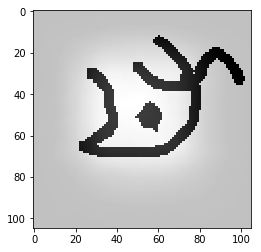

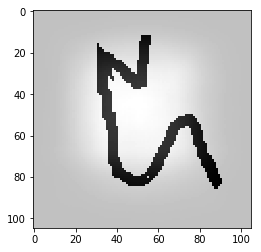

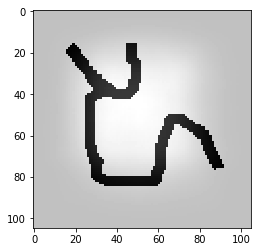

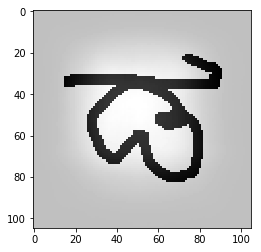

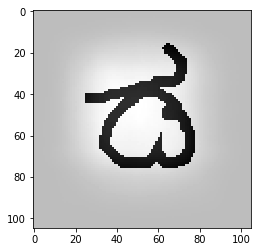

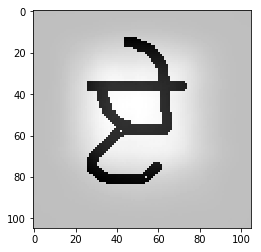

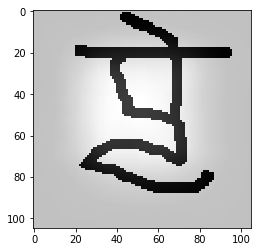

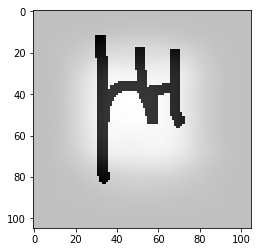

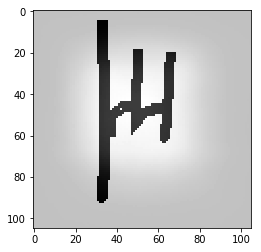

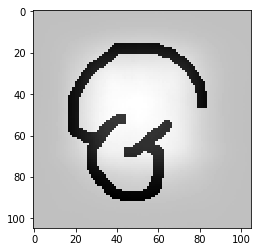

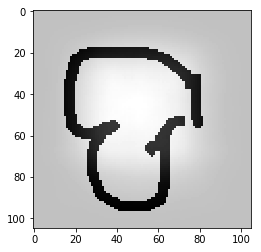

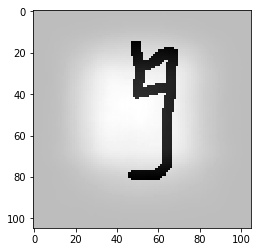

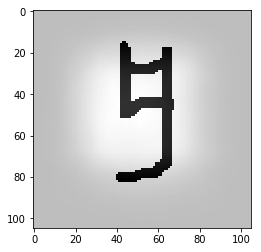

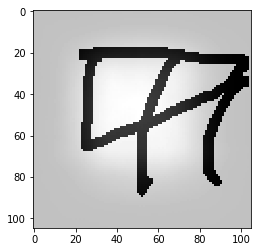

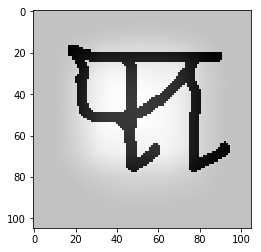

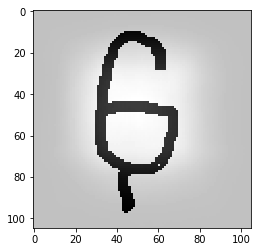

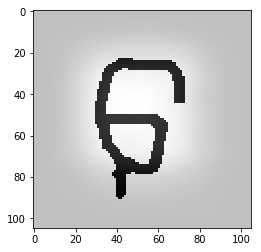

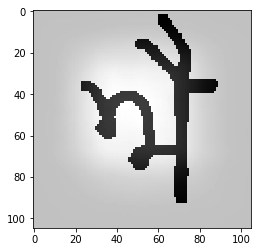

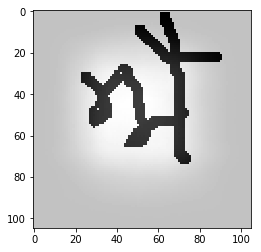

Characters drawn:[244 324 168 103 118 246 305 284  38  38  65 159 159 227 292 197 130 131
 257 179]
Characters drawn:[3 7]
(20, 105, 105, 1)
(20, 105, 105, 1)


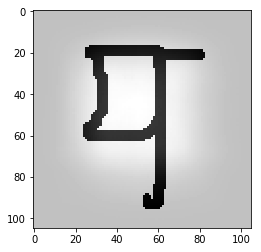

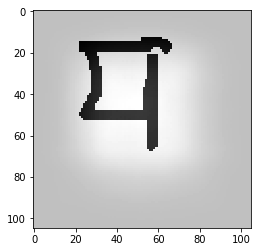

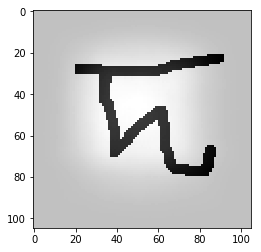

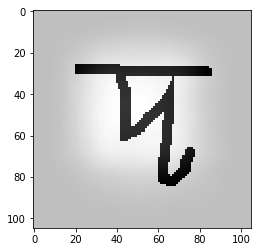

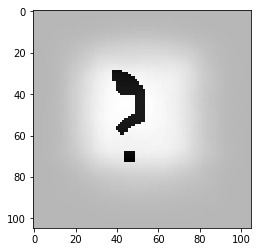

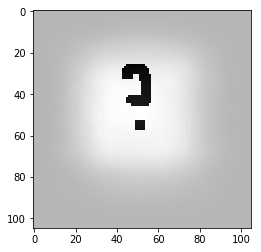

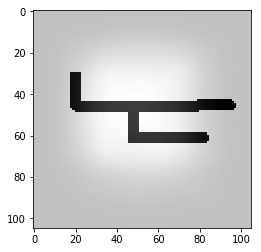

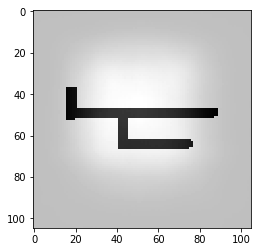

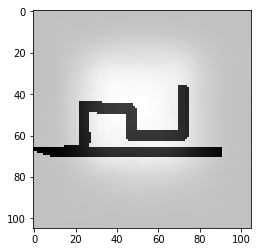

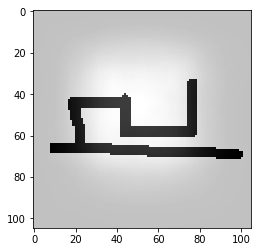

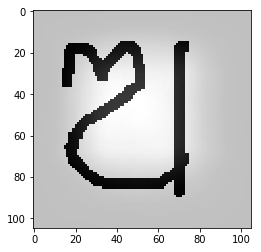

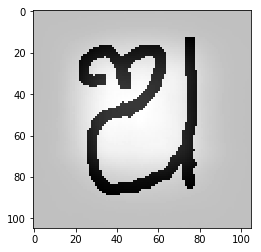

Characters drawn:[142 208  50   0  39  11 149 186   2  39 271 165 298  74 175 113  19 150
 121 256]
Characters drawn:[0 3]
(20, 105, 105, 1)
(20, 105, 105, 1)


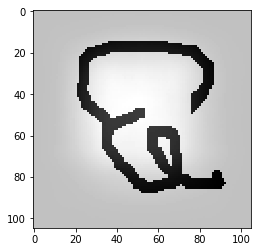

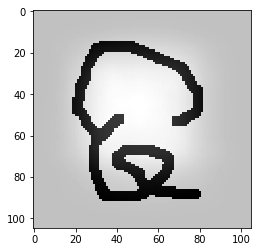

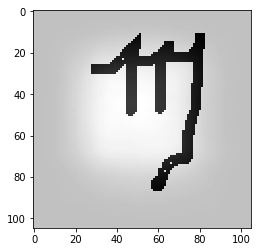

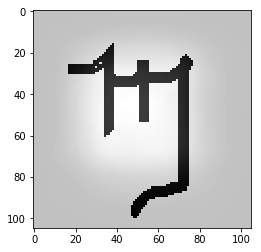

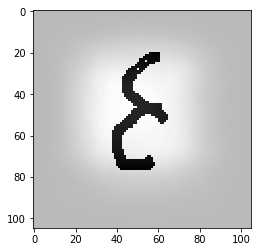

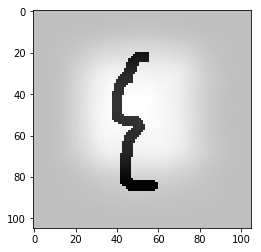

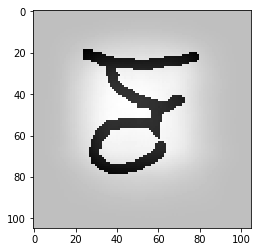

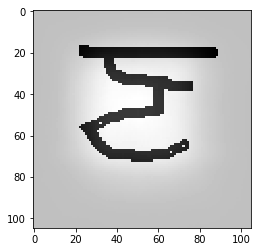

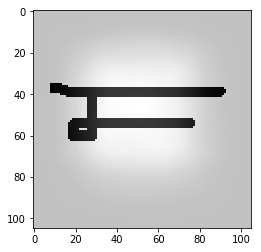

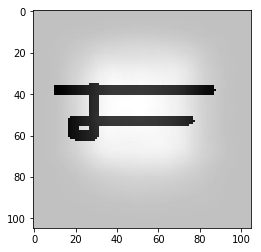

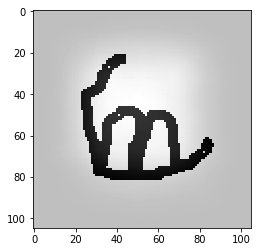

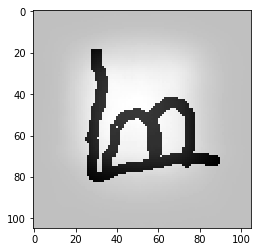

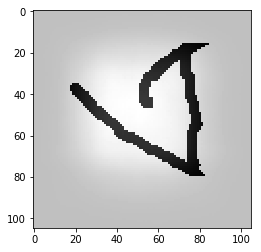

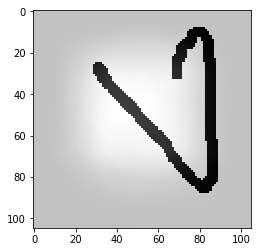

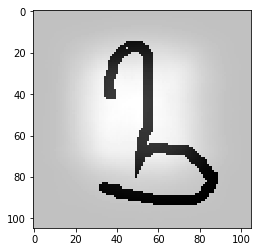

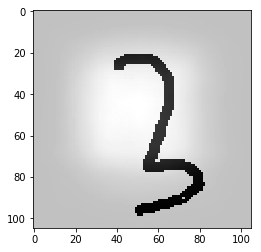

Characters drawn:[ 58 240 278 291 127  39  34 248 316 150 297 123 245 103 209 188 105  85
  50 333]
Characters drawn:[ 8 14]
(20, 105, 105, 1)
(20, 105, 105, 1)


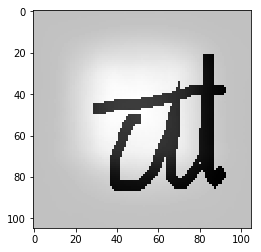

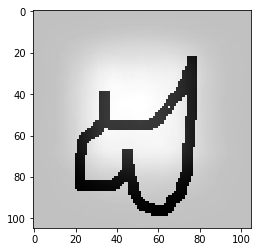

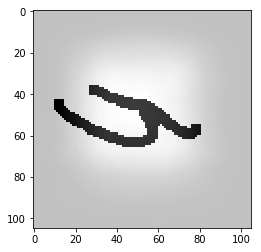

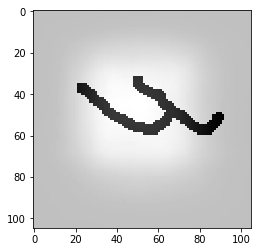

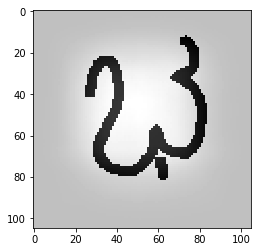

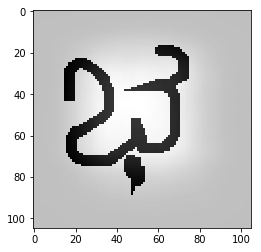

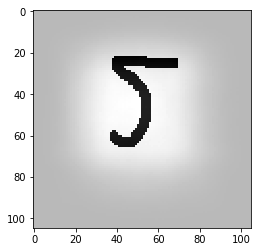

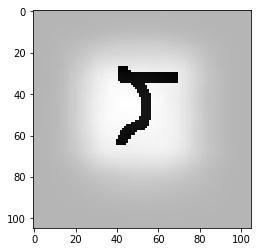

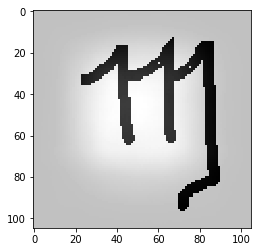

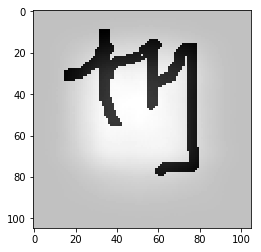

Characters drawn:[326 249 301 215 224 184 226 157 261 157 346 337 227 291 207  58 225 194
 151 145]
Characters drawn:[10 18]
(20, 105, 105, 1)
(20, 105, 105, 1)


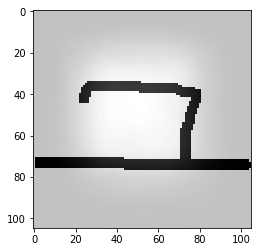

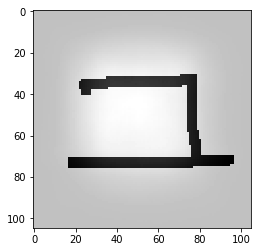

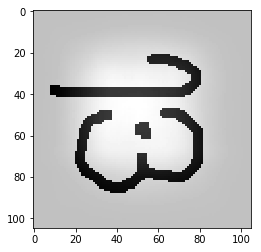

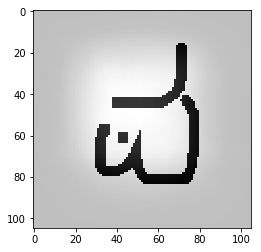

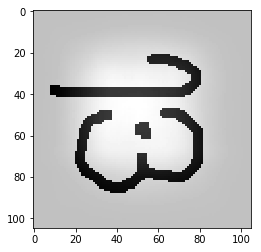

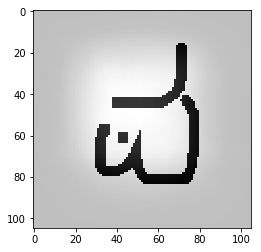

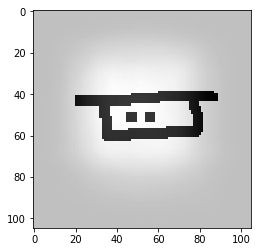

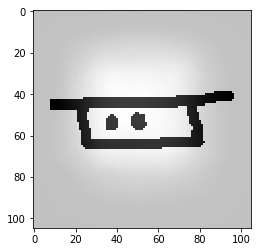

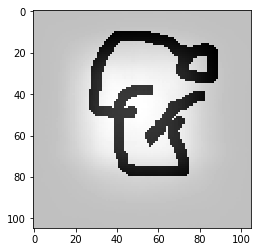

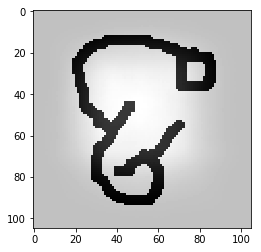

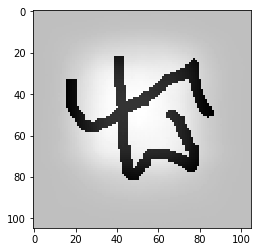

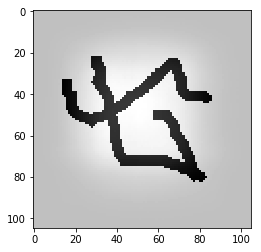

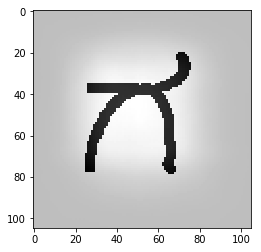

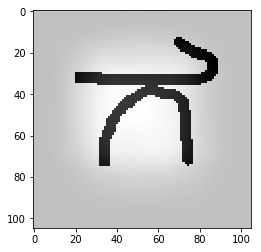

Characters drawn:[309 312  97 181 192 322 298 178  19 228 251  41 221   7 241 263 322 349
 286  39]
Characters drawn:[ 7 14]
(20, 105, 105, 1)
(20, 105, 105, 1)


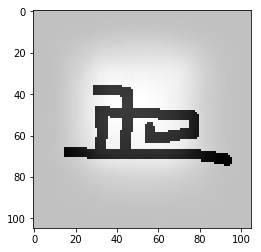

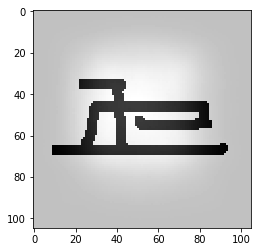

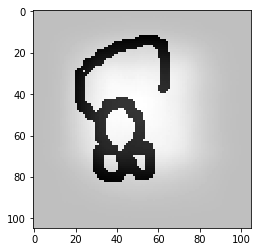

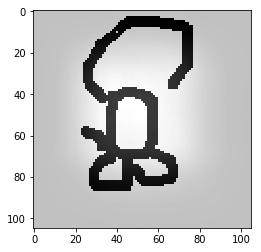

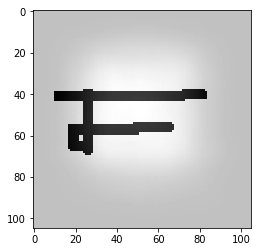

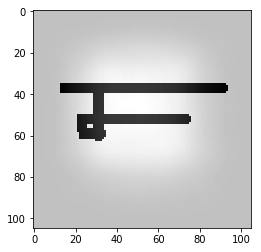

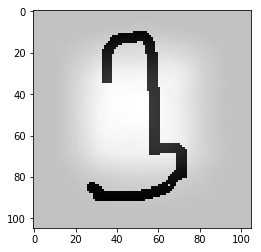

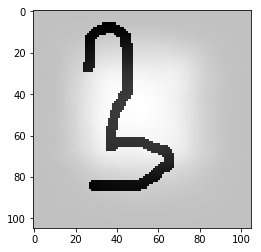

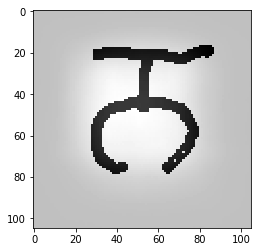

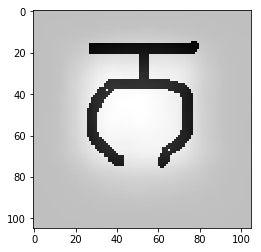

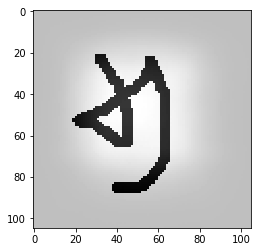

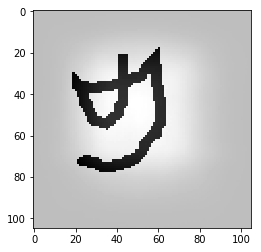

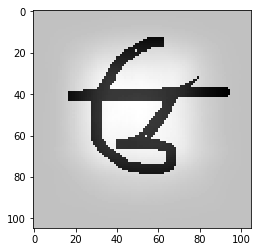

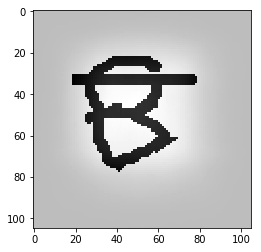

Characters drawn:[338 113 148  26 231  39 119  52  41  86 320  56 236 109 338 141 234  51
 129  27]
Characters drawn:[14  8]
(20, 105, 105, 1)
(20, 105, 105, 1)


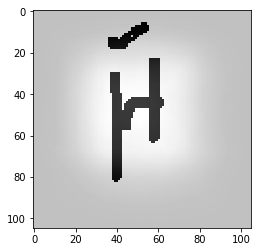

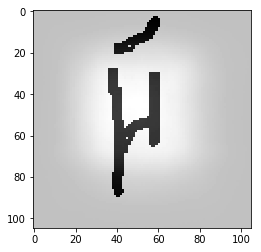

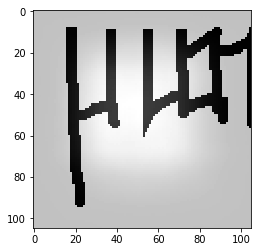

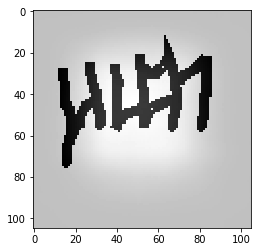

Characters drawn:[338 333 337   6  72  53 160 318 113 259  58  38 218 145 339 314 310 254
 311 349]
Characters drawn:[3 9]
(20, 105, 105, 1)
(20, 105, 105, 1)


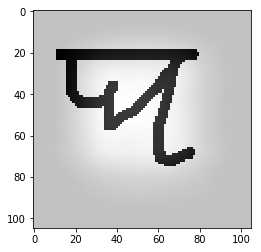

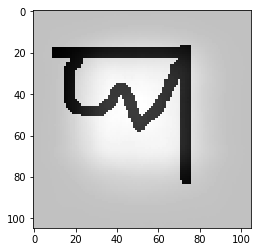

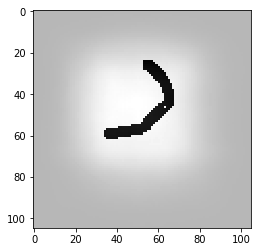

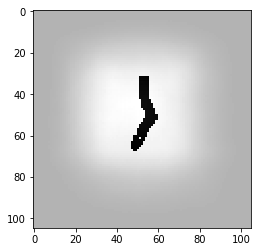

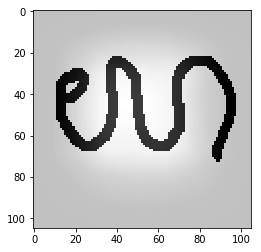

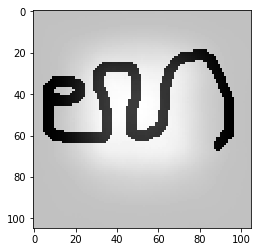

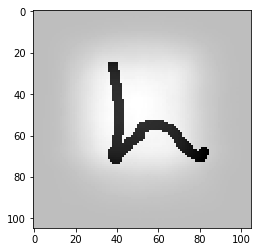

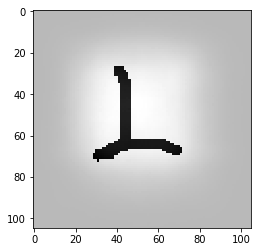

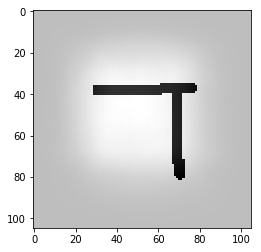

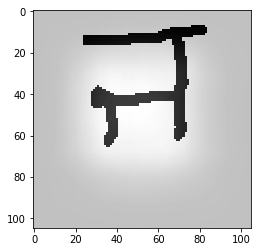

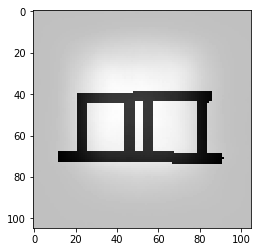

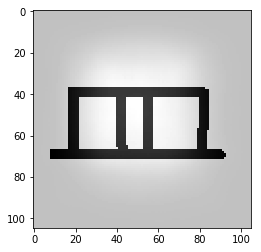

Characters drawn:[168   8 188 334 158 267 137 343 159 179 256 118 184 301 193 295 335  76
 325 305]
Characters drawn:[ 8 18]
(20, 105, 105, 1)
(20, 105, 105, 1)


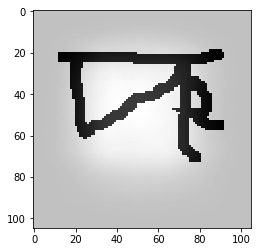

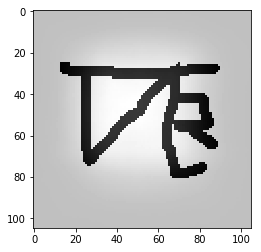

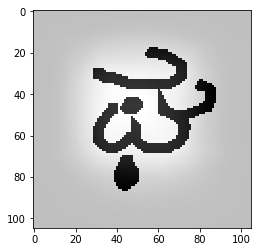

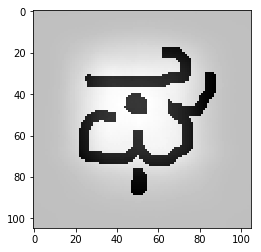

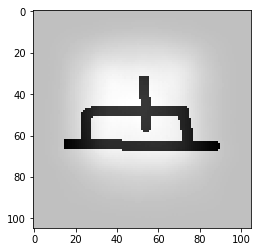

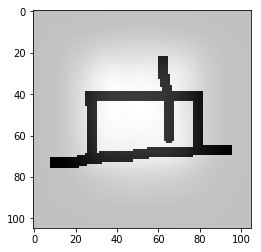

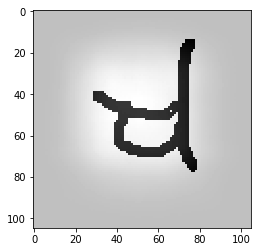

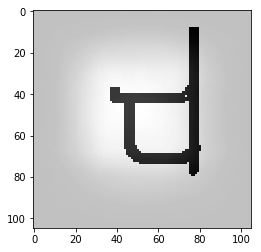

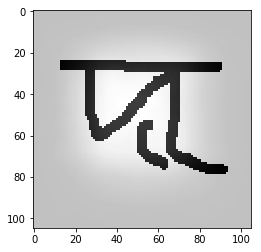

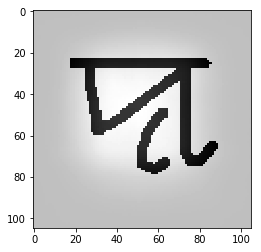

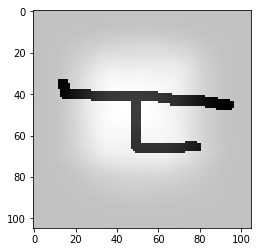

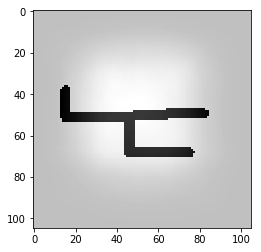

Characters drawn:[249 154 310 153 146 319  37  10  58 327  18 137 276 122 171  15 188 216
 346   9]
Characters drawn:[ 7 14]
(20, 105, 105, 1)
(20, 105, 105, 1)


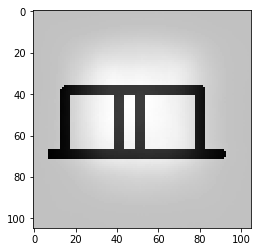

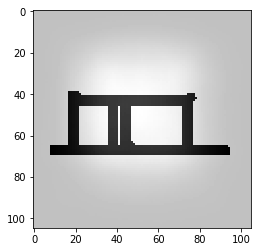

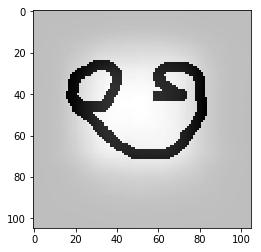

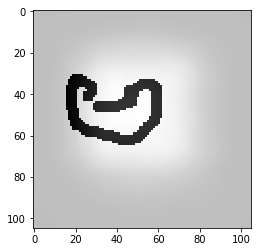

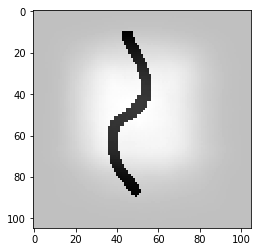

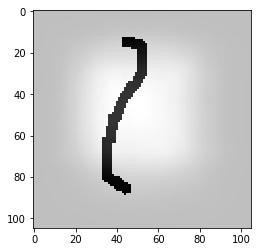

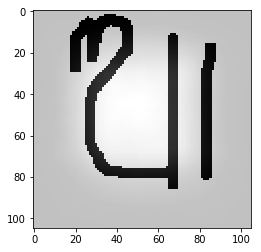

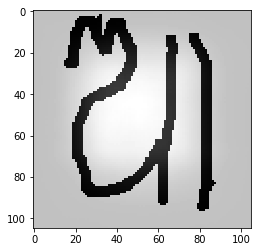

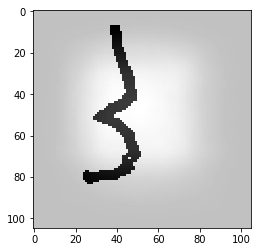

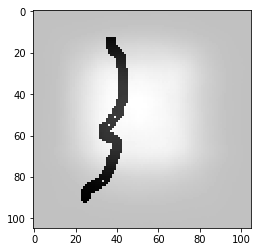

Characters drawn:[206  30 311 333 222 165 135 217  88 225 191  94 310  47 219 276 180 325
 344 149]
Characters drawn:[11 15]
(20, 105, 105, 1)
(20, 105, 105, 1)


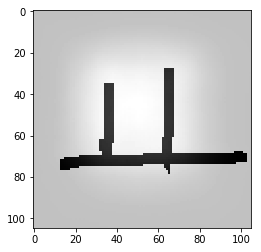

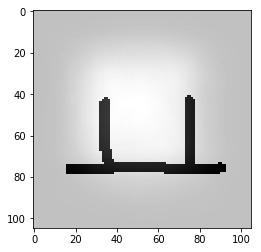

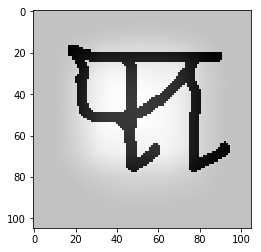

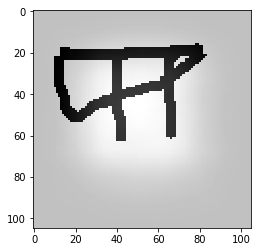

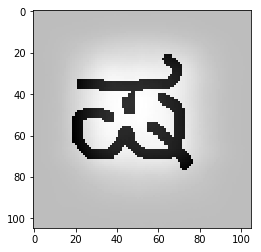

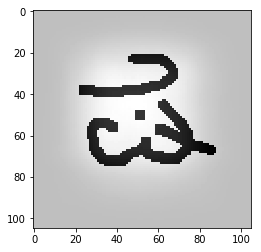

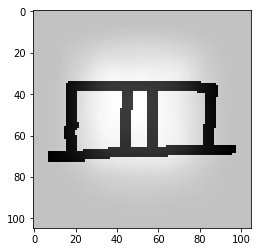

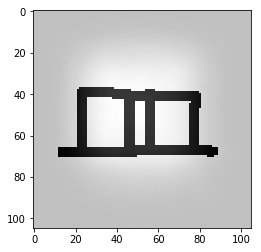

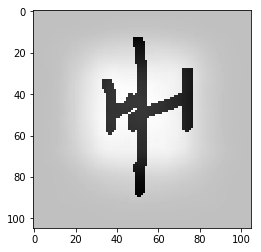

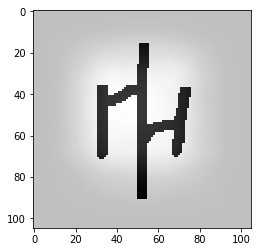

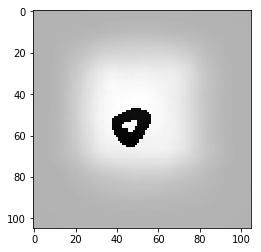

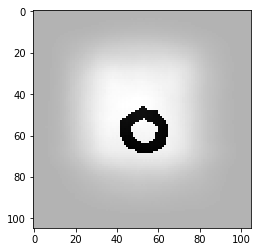

Characters drawn:[ 63 275  82  53 129 307  42 261  26  26 318 281 236 152  15  26 262 198
 169  18]
Characters drawn:[19 12]
(20, 105, 105, 1)
(20, 105, 105, 1)


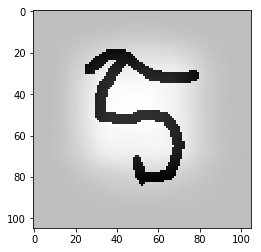

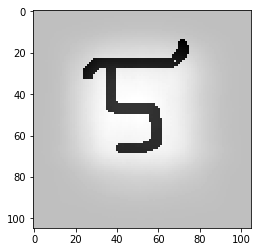

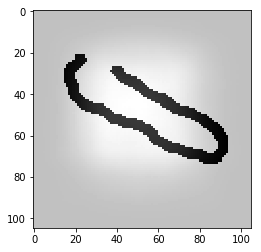

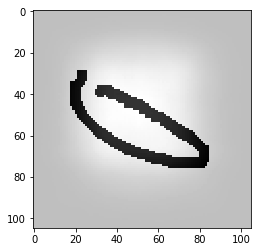

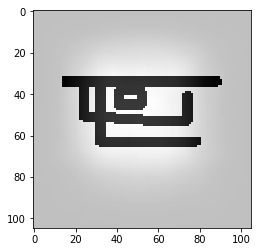

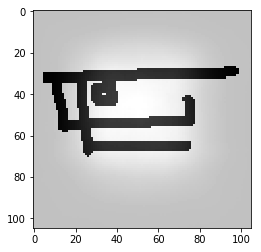

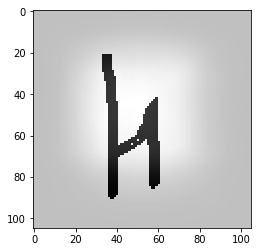

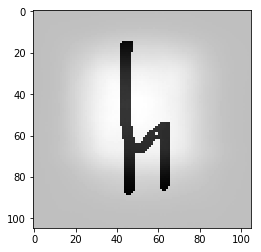

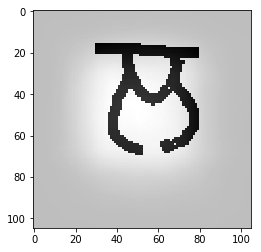

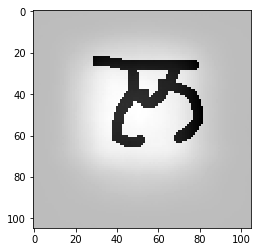

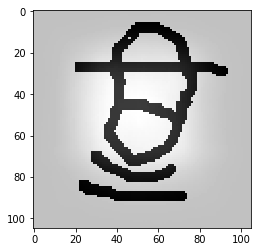

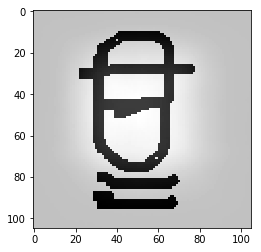

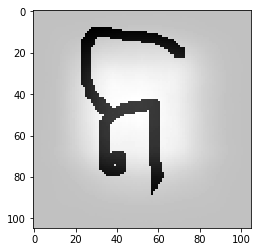

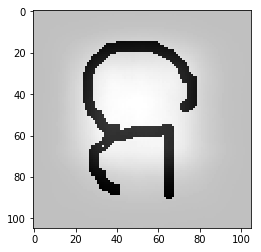

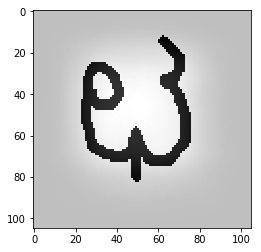

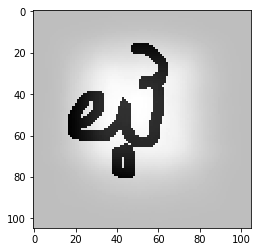

Characters drawn:[134   0  48 172 234 290  94 273 191  43 257 236 214 305  88 301 164 123
 223 115]
Characters drawn:[ 4 11]
(20, 105, 105, 1)
(20, 105, 105, 1)


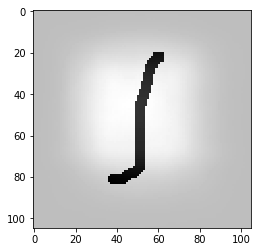

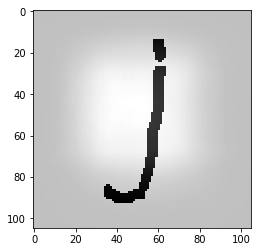

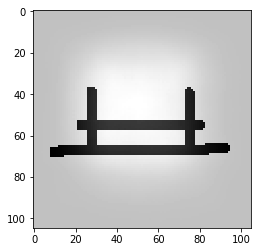

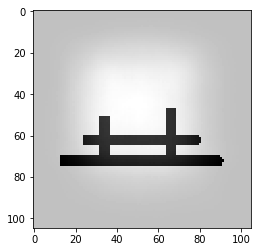

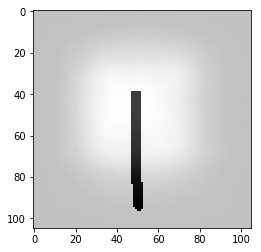

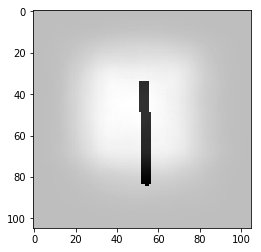

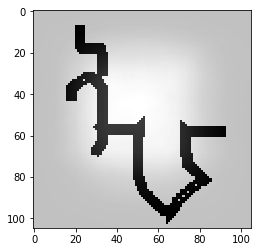

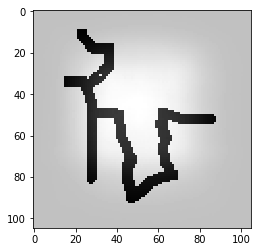

Characters drawn:[170 332 161 256 283 328 296 210  86   2  82 120 274  27   2 147 200 302
 281  83]
Characters drawn:[14 11]
(20, 105, 105, 1)
(20, 105, 105, 1)


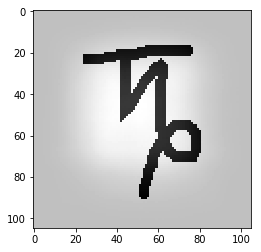

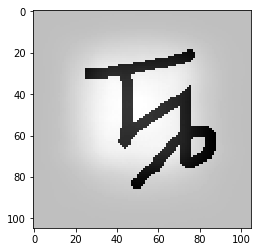

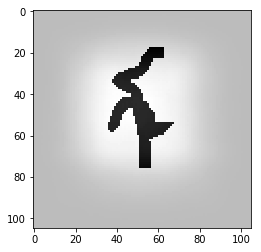

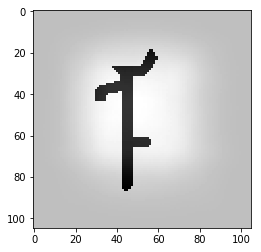

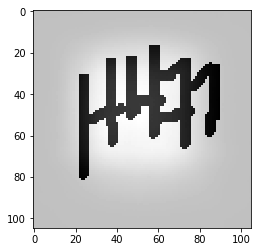

In [ ]:
nn = Siamese()
nn.logits = nn.forward_prop()
print(nn.logits)
probabilities = tf.nn.sigmoid(nn.logits)
saver = tf.train.Saver()
with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer()) # DONT INITIALIZE WHEN LOADING THE PRE-TRAINED WEIGHTS
#     saver.restore(sess,"/Users/mehmetbezcioglu/Downloads/pre_trained_weights/conv_siamese_model.ckpt")
    saver.restore(sess,"/floyd/input/model/conv_siamese_model.ckpt")
    acc = 0
    n_trials = 20
    for i in range(20):
        test_imgs, train_imgs, labels = generateOneShotTrials(test_data)
        for index in range(train_imgs.shape[0]): #20-way 20 trials. Each iteration is one one-shot trial.
            current_image_train_set = np.asarray(list(train_imgs[index]) * 20).reshape(20,105,105,1)
            current_train_img_label = labels[0,index]
            probs = sess.run(probabilities, feed_dict= {nn.X:current_image_train_set , nn.X2:test_imgs})
            predicted_class = np.argmin(probs)
            if labels[0,predicted_class] == labels[0,index]:
                #plot the images to ensure the classification is correct
                plt.imshow(train_imgs[index].reshape(105,105),cmap='gray')
                plt.show()
                plt.imshow(test_imgs[index].reshape(105,105),cmap='gray')
                plt.show()
                acc += 1

    print(acc)
    acc /= n_trials
print("Validation Set Accuracy:{}".format(acc))

In [263]:
print(probabilities)
print(probabilities.shape)

[[0.8992171  0.16651972 0.55156803 0.6323953  0.35505304 0.88876665
  0.40063092 0.20981486 0.23210852 0.17616683 0.51141554 0.451555
  0.90831995 0.23452501 0.23668781 0.87188584 0.74481237 0.58376276
  0.37081075 0.43685105]]
(1, 20)


254
[[ 61 254   8  12 287 209 231 159 271 239 241 197 226   3 343 344 330 203
  128 298]]


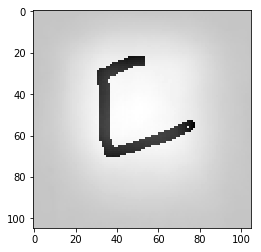

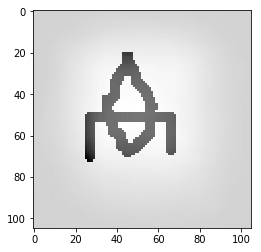

False


In [266]:
predicted_class = np.argmin(probabilities)
print(labels[0,predicted_class])
print(labels)
plt.imshow(train_imgs[6].reshape(105,105),cmap='gray')
plt.show()
plt.imshow(test_imgs[predicted_class].reshape(105,105),cmap='gray')
plt.show()
print(labels[0,predicted_class] == labels[0,6])

# Build the network

Import data.

In [4]:
def model(data,epochs,learning_rate=0.001,batch_size=128,drawer_size=2):
    
    training_batch = data.get_training_pairs(batch_size,drawer_size)
    
    tf.reset_default_graph()

    CNN = Siamese()
    CNN.logits = CNN.forward_prop()
    cost = CNN.compute_cost()
    optimizer = CNN.get_optimizer(optimizer = "Adam", learning_rate = learning_rate).minimize(cost)
    print(optimizer)
    accuracy = tf.reduce_mean(tf.cast((tf.math.equal(CNN.logits,CNN.Y)),tf.float32))
    
#     saver = tf.train.Saver()
#     with tf.Session() as sess:
# #         sess.run(tf.global_variables_initializer())
#         saver.restore
#         losses = []
#         for epoch in range(epochs):
#             epoch_loss = 0
# #             counter = 0
#             for batch in training_batch:
# #                 print("Batch:{}".format(counter))
#                 X1 = batch[0]
#                 X2 = batch[1]
#                 Y  = batch[2]
#                 _, c = sess.run([optimizer,cost], feed_dict={
#                     CNN.X:  X1,
#                     CNN.X2: X2,
#                     CNN.Y:  Y
#                 })
                
#                 epoch_loss += (c/ X1.shape[0])
# #                 counter += 1
#             losses.append(epoch_loss)
#             print("Epoch:{}\t Loss:{}".format(epoch,epoch_loss))
# #       acc = accuracy.eval({CNN.X:, CNN.X2: , CNN.Y: })
#         saver.save(sess,"./model.ckpt") 
# def f(x):
#     x = x + 1
#     return x


In [5]:
data = Loader()
data.X.shape
model(data,10)

Learning rate:0.001
name: "Adam"
op: "NoOp"
input: "^Adam/update_model/W1/ApplyAdam"
input: "^Adam/update_model/W2/ApplyAdam"
input: "^Adam/update_model/W3/ApplyAdam"
input: "^Adam/update_model/W4/ApplyAdam"
input: "^Adam/update_model/W5/ApplyAdam"
input: "^Adam/update_model/W6/ApplyAdam"
input: "^Adam/update_model/b1/ApplyAdam"
input: "^Adam/update_model/b2/ApplyAdam"
input: "^Adam/update_model/b3/ApplyAdam"
input: "^Adam/update_model/b4/ApplyAdam"
input: "^Adam/update_model/b5/ApplyAdam"
input: "^Adam/update_model/b6/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



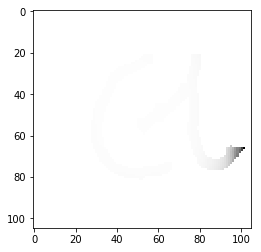

In [13]:
data.X = np.divide(data.X, 255.)
plt.imshow(data.X[0].reshape(105,105),cmap='gray')
plt.show()

(19280, 11025)
(1, 11025)


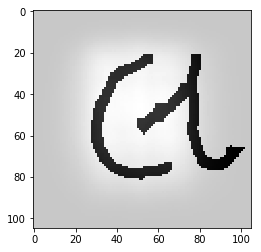

In [16]:
data.X = data.X.reshape(-1,105*105)
print(data.X.shape)

mu = np.mean(data.X,axis=0).reshape(1,11025)
print(mu.shape)
data.X = np.subtract(data.X,mu).reshape(-1,20,105,105,1)
plt.imshow(data.X[0,0].reshape(105,105),cmap='gray')
plt.show()
# var = np.mean(data.X ** 2, axis= 0).reshape(1,11025)
# data.X = np.divide(data.X, var)
# print(data.X.shape)
# plt.imshow(data.X[0].reshape(105,105),cmap='gray')
# plt.show()

In [17]:
data.X.shape

(964, 20, 105, 105, 1)

In [10]:
batch = data.get_training_pairs(128,2)
len(batch[1])
2%10

2

In [15]:
with tf.variable_scope("model",reuse=tf.AUTO_REUSE):
    v = tf.get_variable("v",shape=[1],dtype=tf.float32,initializer=tf.truncated_normal_initializer(mean=0.0,stddev = 0.1, seed=1))
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        v = sess.run(v)
    print(v)

[-0.08113182]


# Test that the batch implementation  is correct

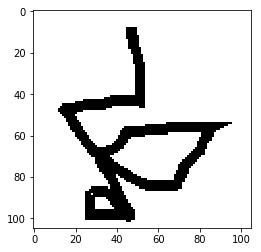

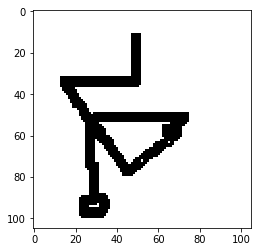

0.0


In [5]:
index = 0

plt.imshow(batch[1][0][index].reshape(105,105),cmap='gray')
plt.show()
plt.imshow(batch[1][1][index].reshape(105,105),cmap='gray')
plt.show()
print(batch[1][2][0][index])

# Prepare the dataset

## `get_batch()` Function

Generate a batch of 5 from 0 to number of characters in the dataset.

In [127]:
_chars = np.random.randint(0,X.shape[0],size=10) 
print("Randomly chosen character indices in the dataset:{}".format(_chars))
_drawers = np.random.randint(0,X.shape[1],size=2)
print("Randomly chosen drawer indices for each chosen character:{}".format(_drawers))


Randomly chosen character indices in the dataset:[546  14 540 653 338  49 300 294 696 507]
Randomly chosen drawer indices for each chosen character:[6 0]


In [128]:
X1 = np.asarray(X[_chars,_drawers[0]])
X2 = np.asarray(X[_chars[:5],_drawers[1]])
_chars_ = (np.random.randint(0,X.shape[0],size=5) + _chars[:5])% X.shape[0]
print("Second chosen characters indices in the dataset:{}".format(_chars_))
X2 = np.concatenate((X2,np.asarray(X[_chars_,_drawers[0]])),axis=0)
for char in _chars_:
    print(np.sum(char == _chars))

Second chosen characters indices in the dataset:[478 432   9 428 302]
0
0
0
0
0


In [129]:
print(X1.shape)
print(X2.shape)
# 1st half is the 'same' labels, second half is the 'different' labels
labels = np.concatenate((np.zeros([1,5]),np.ones([1,5])),axis=1)
print(labels)

(10, 105, 105, 1)
(10, 105, 105, 1)
[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]]


# Train the model